# Q2

a)

In [147]:
from sklearn.datasets import load_boston

attrs, prices = load_boston(return_X_y=True)

b)

In [148]:
import numpy as np
from scipy import stats

print("Number of data points:", len(attrs))
print("Number of features:", len(attrs[1]))
print("Mean house price:", round(prices.mean() * 1000, 2), "dollars")
print("Median house price:", round(np.quantile(prices, 0.5) * 1000, 2), "dollars")
print("Third quartile house price:", round(np.quantile(prices, 0.75) * 1000, 2), "dollars")
print("First quartile house price:", round(np.quantile(prices, 0.25) * 1000, 2), "dollars")
print("House price IQR", round((np.quantile(prices, 0.75) - np.quantile(prices, 0.25)) 
                               * 1000, 2), "dollars")
print("House price variance:", round(np.var(prices) * 1000000, 2), "square dollars")
print("House price standard deviation:", round(np.std(prices) * 1000, 2), "dollars")
print("House price mode:", round(stats.mode(prices)[0][0] * 1000, 2), "dollars")
print("House price maximum:", round(np.max(prices) * 1000, 2), "dollars")
print("House price minimum:", round(np.min(prices) * 1000, 2), "dollars")
print("House price range:", round((np.max(prices) - np.min(prices)) * 1000, 2), "dollars")

Number of data points: 506
Number of features: 13
Mean house price: 22532.81 dollars
Median house price: 21200.0 dollars
Third quartile house price: 25000.0 dollars
First quartile house price: 17025.0 dollars
House price IQR 7975.0 dollars
House price variance: 84419556.16 square dollars
House price standard deviation: 9188.01 dollars
House price mode: 50000.0 dollars
House price maximum: 50000.0 dollars
House price minimum: 5000.0 dollars
House price range: 45000.0 dollars


c)

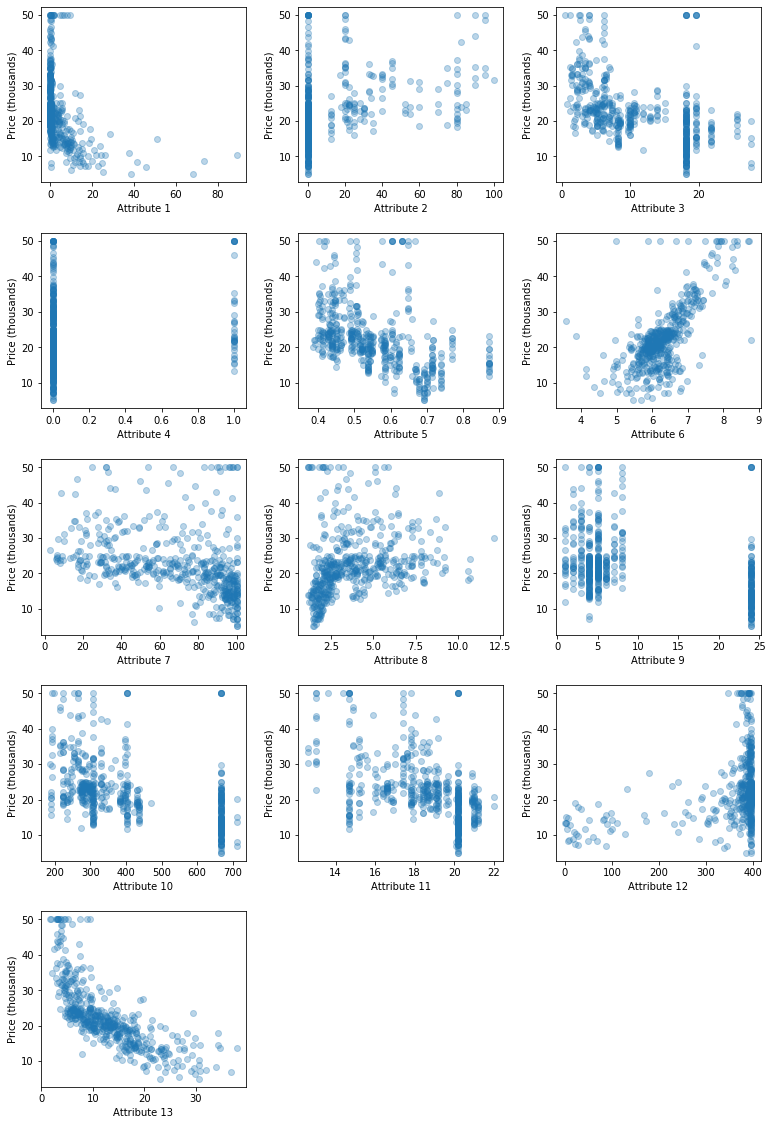

In [149]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(5, 3, figsize=(10, 10))
fig.tight_layout()
fig.subplots_adjust(2, 0, 3, 1.5)
ax = ax.flatten()

for i in range(13):
    # Get attribute value for all houses
    attr_vals = [attrs[j][i] for j in range(len(prices))]
    ax[i].scatter(attr_vals, prices, alpha=0.3)
    ax[i].set_xlabel("Attribute " + str(i + 1))
    ax[i].set_ylabel("Price (thousands)")

# The last two plots are not used
ax[13].set_visible(False)
ax[14].set_visible(False)

d)

In [150]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=True).fit(attrs, prices)
print("The coefficients are ", reg.coef_)
print("The bias is ", reg.intercept_)

The coefficients are  [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
The bias is  36.459488385089855


e)

In [160]:
from tabulate import tabulate

print(tabulate([reg.coef_[0:7]], headers=["Attribute " + str(i + 1) for i in range(7)]), "\n")
print(tabulate([reg.coef_[7:13]], headers=["Attribute " + str(i + 1) for i in range(7, 13)]))

   Bias    Attribute 1    Attribute 2    Attribute 3    Attribute 4    Attribute 5    Attribute 6    Attribute 7
-------  -------------  -------------  -------------  -------------  -------------  -------------  -------------
39.4939      -0.130942      0.0400274      0.0168977        4.10661       -22.8289        3.60205      0.0239544 

  Attribute 8    Attribute 9    Attribute 10    Attribute 11    Attribute 12    Attribute 13
-------------  -------------  --------------  --------------  --------------  --------------
      -1.2302       0.348682     -0.00813584         -1.0329       0.0059223       -0.561161


The weight in the third column has a positive sign, which indicates there is a positive correlation associated with the attribute (proportion of non-retail business acres per town) and house value.

The sign does not match what I expected. I expected that non-retail businesses encompasses business that perform resource extraction and manufacturing, which indicates land is for farming and is far from urban centers. Such land would be far away from businesses, schools, medical care, and other facilities typical of urban areas so I would expect that as the proportion of such land increases, the house price decreases which would mean a negative weight sign.

f)

In [152]:
from sklearn.metrics import mean_squared_error

print("Mean squared error of model on test set: ", 
      mean_squared_error(prices, reg.predict(attrs)))

Mean squared error of model on test set:  21.894831181729202


g) The first error metric is the mean absolute error, which given $(a_{1}, p_{1}), \ldots (a_{n}, p_{n})$ of pairs of actual and predicted values, the error is
\begin{align}
E_{\text{MAE}} = \dfrac{1}{n}\sum_{i = 1}^{n}|a_{n} - p_{n}|
\end{align}

In [153]:
from sklearn.metrics import mean_absolute_error

print("Mean absolute error of model on test set: ", 
      mean_absolute_error(prices, reg.predict(attrs)))

Mean absolute error of model on test set:  3.2708628109003115


The second error metric is the maximum error, which given $(a_{1}, p_{1}), \ldots (a_{n}, p_{n})$ of pairs of actual and predicted values, the error is
\begin{align}
E_{\text{ME}} = \max\{|a_{i} - p_{i}|\}_{i = 1}^{n}
\end{align}

In [154]:
from sklearn.metrics import max_error

print("Max error of model on test set: ", 
      max_error(prices, reg.predict(attrs)))

Max error of model on test set:  26.199270977908505


h)